In [9]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [10]:
# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

In [11]:
# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [12]:
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [13]:
# Combine the data into a single dataset
ride_city_df = pd.merge(city_data_df, ride_data_df, on="city")
# Display the data table for preview
ride_city_df.head()


,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [14]:
#data munging to create necessary city type dataframes
avg_fare_per_city = ride_city_df.groupby(["city", "type"])["fare"].mean()
avg_fare_per_city.head()

city           type    
Amandaburgh    Urban       24.641667
Barajasview    Urban       25.332273
Barronchester  Suburban    36.422500
Bethanyland    Suburban    32.956111
Bradshawfurt   Rural       40.064000
Name: fare, dtype: float64

In [17]:
avg_fare_urban_df = ride_city_df.loc[ride_city_df.type == "Urban", ["city", "ride_id", "fare",
                                                                           "driver_count"]]
avg_fare_urban_df.head()
avg_fare_suburban_df = ride_city_df.loc[ride_city_df.type == "suburban", ["city", "ride_id", "fare", "driver_count"]]
avg_fare_rural_df = ride_city_df.loc[ride_city_df.type == "rural", ["city", "ride_id", "fare", "driver_count"]]

In [18]:
#create driver count df per city type
driver_count_urban = avg_fare_urban_df.groupby("city")["driver_count"]

In [19]:
#create dataframes for fare by city type
avg_fare_suburban_df = ride_city_df.loc[ride_city_df.type == "Suburban", ["city", "ride_id", "fare",
                                                                         "driver_count"]]
avg_fare_suburban_df.head()


,city,ride_id,fare,driver_count
1625,Port Shane,4022340141966,27.66,7
1626,Port Shane,8341982666719,42.26,7
1627,Port Shane,2803204948363,14.95,7
1628,Port Shane,6010401984537,19.03,7
1629,Port Shane,2552978514662,31.58,7


In [20]:
avg_fare_rural_df = ride_city_df.loc[ride_city_df.type == "Rural", ["city", "ride_id", "fare",
                                                                   "driver_count"]]
avg_fare_rural_df.head()

,city,ride_id,fare,driver_count
2250,South Jennifer,9135979586871,21.63,7
2251,South Jennifer,9730627367446,48.79,7
2252,South Jennifer,683983658392,32.20,7
2253,South Jennifer,3828267773041,14.11,7
2254,South Jennifer,623928772332,43.25,7


In [21]:
total_driver_count = ride_city_df.groupby("city")["driver_count"]
total_driver_count.count().head()

city
Amandaburgh      18
Barajasview      22
Barronchester    16
Bethanyland      18
Bradshawfurt     10
Name: driver_count, dtype: int64

In [22]:
driver_count_rural = avg_fare_rural_df.groupby("city")["driver_count"]
driver_count_rural.count()
driver_count_suburban = avg_fare_suburban_df.groupby("city")["driver_count"]
driver_count_suburban.count().head()

city
Barronchester    16
Bethanyland      18
Brandonfort      19
Colemanland      22
Davidfurt        17
Name: driver_count, dtype: int64

In [24]:
avg_fare_rural = avg_fare_rural_df.groupby("city")["fare"].mean()
avg_fare_urban = avg_fare_urban_df.groupby("city")["fare"].mean()
avg_fare_suburban = avg_fare_suburban_df.groupby("city")["fare"].mean()

In [25]:
rural_count = avg_fare_rural_df.groupby("city")["ride_id"].count()
rural_count.head()

city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Jessicaport        6
Lake Jamie         6
Name: ride_id, dtype: int64

In [26]:
urban_count = avg_fare_urban_df.groupby("city")["ride_id"].count()
urban_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [27]:
suburban_count = avg_fare_suburban_df.groupby("city")["ride_id"].count()
suburban_count.head()

city
Barronchester    16
Bethanyland      18
Brandonfort      19
Colemanland      22
Davidfurt        17
Name: ride_id, dtype: int64

## Bubble Plot of Ride Sharing Data

In [28]:
# Obtain the x and y coordinates for each of the three city types
dfy = pd.DataFrame({
    "test": avg_fare_per_city
})
dfy.head()
dfx = ride_city_df.groupby(["city","type"])["ride_id"].count()
dfx.head()


city           type    
Amandaburgh    Urban       18
Barajasview    Urban       22
Barronchester  Suburban    16
Bethanyland    Suburban    18
Bradshawfurt   Rural       10
Name: ride_id, dtype: int64

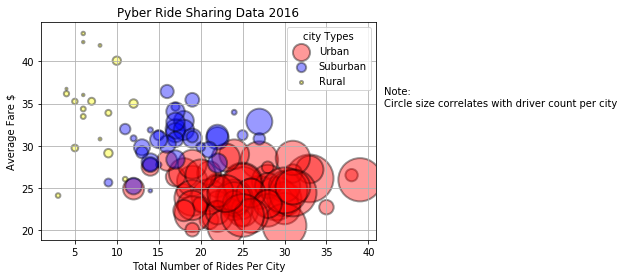

In [32]:
# Build the scatter plots for each city types
plt.scatter(urban_count, avg_fare_urban, color="red", edgecolors="black",
            s =driver_count_urban.sum(), alpha=0.4, linewidths=2)
plt.scatter(suburban_count, avg_fare_suburban, color="blue", edgecolors="black",
           s =driver_count_suburban.sum(), alpha=0.4, linewidths=2)
plt.scatter(rural_count, avg_fare_rural, color="yellow", edgecolors="black",
           s =driver_count_rural.sum(), alpha=0.4, linewidths=2)
# Incorporate the other graph properties
plt.xlabel("Total Number of Rides Per City")
plt.ylabel("Average Fare $")
plt.title("Pyber Ride Sharing Data 2016")
# Create a legend
plt.legend(["Urban", "Suburban","Rural"], markerscale=0.5, title="city Types")

# Incorporate a text label regarding circle size
plt.figtext(0.92, 0.59, "Note:" + "\n" + "Circle size correlates with driver count per city")
plt.grid()
plt.savefig("Pyber Ride Sharing Data 2016", facecolor='w', edgecolor='w')
#plt.savefig(Ride_Sharing, facecolor='w', edgecolor='w')
# Show plot
plt.show()

## Total Fares by City Type

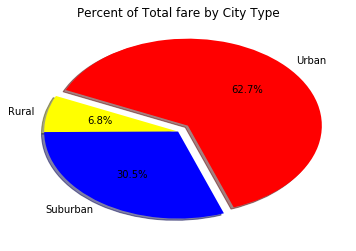

In [34]:
# Calculate Type Percents
total_fare_urban = avg_fare_urban_df["fare"].sum()
#total_fare_urban
total_fare_suburban = avg_fare_suburban_df["fare"].sum()
#total_fare_suburban
total_fare_rural = avg_fare_rural_df["fare"].sum()
#total_fare_rural
# Build Pie Chart
labels = "Urban", "Rural", "Suburban"
sizes = [total_fare_urban, total_fare_rural, total_fare_suburban]
colors = ["red", "yellow", "blue"]
explode = (0.1, 0, 0)
plt.title("Percent of Total fare by City Type")
plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%", explode=explode, startangle=290,
       shadow=True)
# Save Figure
plt.savefig("Percent_fare_by_city.png")

In [ ]:
# Show Figure
plt.show()

## Total Rides by City Type

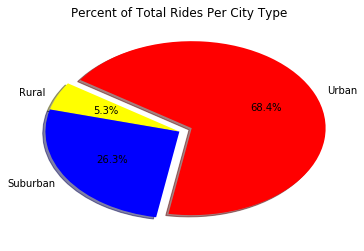

In [35]:
# Calculate Ride Percents
total_ride_urban = avg_fare_urban_df["ride_id"].count()
total_ride_suburban = avg_fare_suburban_df["ride_id"].count()
total_ride_rural = avg_fare_rural_df["ride_id"].count()

# Build Pie Chart
labels = "Urban", "Rural", "Suburban"
Rides = [total_ride_urban, total_ride_rural, total_ride_suburban]
colors = "red", "yellow", "blue"
explode = (0.1, 0, 0)
plt.title("Percent of Total Rides Per City Type")
plt.pie(Rides, labels=labels, colors=colors, autopct="%1.1f%%", explode=explode, startangle=260, 
       shadow=True)
# Save Figure
plt.savefig("Ride_by_city_type.png")
#plt.savefig(Rides)

In [ ]:
# Show Figure
plt.show()

## Total Drivers by City Type

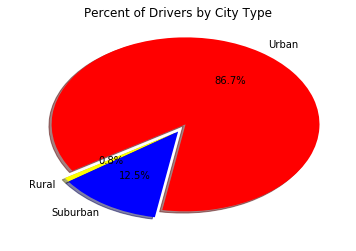

In [36]:
# Calculate Driver Percents
total_driver_urban = avg_fare_urban_df["driver_count"].sum()
total_driver_suburban = avg_fare_suburban_df["driver_count"].sum()
total_driver_rural = avg_fare_rural_df["driver_count"].sum()

# Build Pie Charts
labels = "Urban", "Rural", "Suburban"
drivers = [total_driver_urban, total_driver_rural, total_driver_suburban]
colors = ["red", "yellow", "blue"]
explode = (0.1, 0, 0)
plt.title("Percent of Drivers by City Type")
plt.pie(drivers, labels=labels, colors=colors, autopct="%1.1f%%", explode=explode, startangle=260, shadow=True)

# Save Figure
plt.savefig("Driver_percent.png")

In [37]:
# Show Figure


#Observations
1. The urban cities are the busiest, having the more number of rides and drivers. 
2. The fare rates is lowest in the rural city-type, perhaps it has something to do with "obersavation 1"